In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from gensim.models import doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import preprocessing

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import plot_model

In [ ]:
import spacy

In [ ]:
from tqdm import tqdm
import random

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
#!pip install contextualSpellCheck

In [ ]:
import contextualSpellCheck

In [ ]:
#!pip install autocorrect

In [ ]:
from autocorrect import Speller

In [ ]:
from spacy.matcher import Matcher

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, anneal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fake reviews detection/chi_hotel_dataset.csv')

In [ ]:
#df = pd.read_csv('restaurant_reviews_anonymized.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Real,Review
0,1,Let me begin by saying that there are two kind...
1,1,The only place inside the Loop that you can st...
2,1,I have walked by the Tokyo Hotel countless tim...
3,1,"If you are considering staying here, watch thi..."
4,1,"This place is disgusting, absolutely horrible,..."


In [ ]:
#df.rename(columns = {'Reviews':'Review'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Real    5854 non-null   int64 
 1   Review  5854 non-null   object
dtypes: int64(1), object(1)
memory usage: 91.6+ KB


In [ ]:
#df = df[~df['Review'].isnull()]

In [ ]:
#df.reset_index(inplace=True)

## Data preprocessing

In [ ]:
new_data = []

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
for line in df['Review']:
    a = re.sub('[^a-zA-Z]', ' ', line).lower()
    word_tokens = word_tokenize(a)
    filtered = [w for w in word_tokens if not w in stop_words]
    new_data.append(' '.join(filtered))

In [ ]:
new_data[:5]

['let begin saying two kinds people give tokyo hotel stars rave everyone know people get past broken phone blood stains beeping fire alarms peg legged receptionist lack water pressure cracked walls strange smells questionable elevator televisions left die digital conversion possibility air conditioner may fall window moment said whole heartedly give tokyo hotel stars place quietly slip nothing show faint memory imitation thomas kinkade painting bolted wall bed continental breakfast coffee lobby vending machines pretty sure wont take change minted senses assaulted leave enough memories compete mile road trip beg anyone even mildly considering staying give chance location prime able walk michigan ave river walk middle night without straying far hotel grocery store block away parking may cost hotel room across street besides place cheap super cheap downtown chicago closest price found area four times expensive sure grab cash accept credit cards rules though say hello clifton jackson homel

In [ ]:
final_data = [x for x in new_data if x != '']

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d), tags=[str(i)]) for i, _d in enumerate(final_data)]

In [ ]:
tagged_data[:2]

[TaggedDocument(words=['let', 'begin', 'saying', 'two', 'kinds', 'people', 'give', 'tokyo', 'hotel', 'stars', 'rave', 'everyone', 'know', 'people', 'get', 'past', 'broken', 'phone', 'blood', 'stains', 'beeping', 'fire', 'alarms', 'peg', 'legged', 'receptionist', 'lack', 'water', 'pressure', 'cracked', 'walls', 'strange', 'smells', 'questionable', 'elevator', 'televisions', 'left', 'die', 'digital', 'conversion', 'possibility', 'air', 'conditioner', 'may', 'fall', 'window', 'moment', 'said', 'whole', 'heartedly', 'give', 'tokyo', 'hotel', 'stars', 'place', 'quietly', 'slip', 'nothing', 'show', 'faint', 'memory', 'imitation', 'thomas', 'kinkade', 'painting', 'bolted', 'wall', 'bed', 'continental', 'breakfast', 'coffee', 'lobby', 'vending', 'machines', 'pretty', 'sure', 'wont', 'take', 'change', 'minted', 'senses', 'assaulted', 'leave', 'enough', 'memories', 'compete', 'mile', 'road', 'trip', 'beg', 'anyone', 'even', 'mildly', 'considering', 'staying', 'give', 'chance', 'location', 'prime

In [ ]:
# print('Av WL:', avg_wl,'\nPausality:', pausality, '\naverage NP:', anp,'\nSL:', avg_sl,'\nCl:', n_cl,'\nWords:', len(words), '\nVerbs:', n_verbs,
#       '\nAdj:', n_adj,'\nPassive:', n_passive, '\nEmo:', emo,'\nCDV:', cdv,'\nRedun:', redun, '\nLXD:', lxd, '\nMV:',n_mv, '\nTypos:', n_typos)

## Embedding

In [ ]:
# max_epochs = 500
# alpha = 0.025

# model = Doc2Vec(vector_size=110, alpha=alpha, min_alpha=0.00025, min_count=1, dm=1)
  
# model.build_vocab(tagged_data)

# for epoch in tqdm(range(max_epochs)):
#     model.train(tagged_data,
#                 total_examples=model.corpus_count,
#                 epochs=model.epochs)
#     model.alpha -= 0.0002
#     model.min_alpha = model.alpha


In [ ]:
model = doc2vec.Doc2Vec(vector_size = 300, window = 15, min_count = 1, workers = 2, epochs=10)

model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=100)
model.save('d2v.model')

In [ ]:
doc2vec_model = model

In [ ]:
#len(doc2vec_model.docvecs)

In [ ]:
v = []

for i in range(len(df)):
    v.append(doc2vec_model.docvecs[i])

<ipython-input-89-737b6698745b>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  v.append(doc2vec_model.docvecs[i])


In [ ]:
# X = v
# y = df['Real']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
df_features = pd.read_csv('/content/drive/MyDrive/Fake reviews detection/chi_hotel_features.csv')

## Neural network

In [ ]:
X = v
y = df['Real']

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
xx = []

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(df_features)
feat = scaler.transform(df_features)

In [ ]:
for i in range(len(X)):
    xx.append(np.append(X[i], feat[i]))

In [ ]:
X = np.array(xx)

In [ ]:
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.15)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(4228, 315) (747, 315) (879, 315)


In [ ]:
model = Sequential()

model.add(Conv1D(filters=128, kernel_size=9, padding='same', activation='relu', input_shape=(315, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=128, kernel_size=6, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(64, activation='softmax'))
model.add(Dense(1))


model.compile(loss='binary_crossentropy',
              optimizer=Adam(1e-4),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 315, 128)          1280      
                                                                 
 dropout_7 (Dropout)         (None, 315, 128)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 157, 128)         0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 157, 128)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 157, 128)          98432     
                                                                 
 dropout_9 (Dropout)         (None, 157, 128)          0         
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), validation_steps=30, batch_size=16)

Epoch 1/15
265/265 [==============================] - 112s 393ms/step - loss: 8.1686 - accuracy: 0.1355 - val_loss: 1.2804 - val_accuracy: 0.1312
Epoch 2/15
265/265 [==============================] - 103s 390ms/step - loss: 1.0556 - accuracy: 0.1355 - val_loss: 0.9855 - val_accuracy: 0.1312
Epoch 3/15
265/265 [==============================] - 102s 387ms/step - loss: 0.9457 - accuracy: 0.1355 - val_loss: 0.9145 - val_accuracy: 0.1312
Epoch 4/15
265/265 [==============================] - 101s 380ms/step - loss: 0.8836 - accuracy: 0.1355 - val_loss: 0.8579 - val_accuracy: 0.1312
Epoch 5/15
265/265 [==============================] - 104s 391ms/step - loss: 0.8315 - accuracy: 0.1355 - val_loss: 0.8089 - val_accuracy: 0.1312
Epoch 6/15
265/265 [==============================] - 104s 390ms/step - loss: 0.7855 - accuracy: 0.1355 - val_loss: 0.7647 - val_accuracy: 0.1312
Epoch 7/15
265/265 [==============================] - 103s 390ms/step - loss: 0.7439 - accuracy: 0.1355 - val_loss: 0.7247 -

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 3s 91ms/step - loss: 0.4910 - accuracy: 0.8737


[0.49098947644233704, 0.873720109462738]

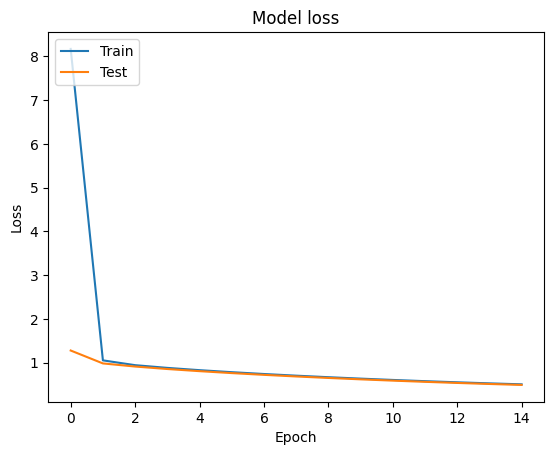

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

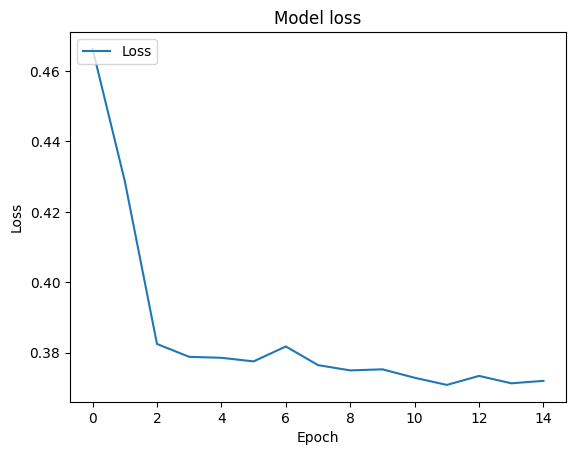

In [ ]:
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper left')
plt.show()

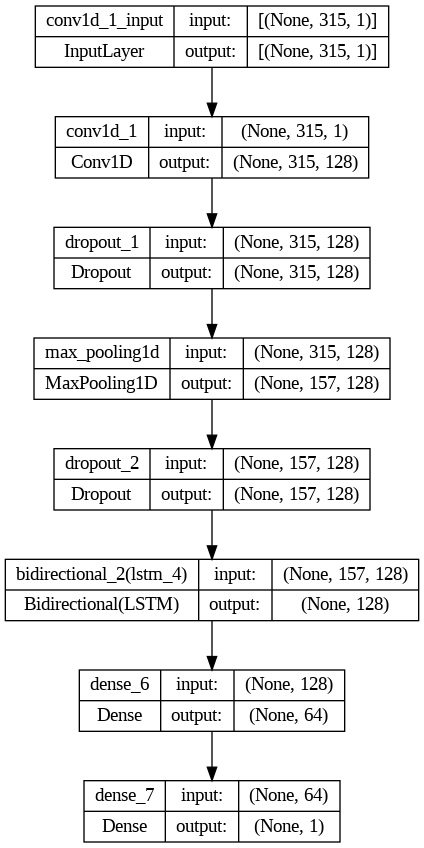

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)